In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Load

- SAMPLE_00000 ~ SAMPLE_62628은 일정한 텀 마다 센서에서 온도를 측정한 데이터이며, 이 과정에서 기기/통신 결함으로 인한 결측이 발생
- id : 샘플 고유 ID
- Value : 일정한 텀 마다 센서에서 측정된 온도 값 (°C)


In [2]:
data_df = pd.read_csv("./data/data.csv")
data_df

,id,Value
0,SAMPLE_00000,27.636770
1,SAMPLE_00001,27.250818
2,SAMPLE_00002,27.154348
3,SAMPLE_00003,NaN
4,SAMPLE_00004,NaN
...,...,...
62624,SAMPLE_62624,NaN
62625,SAMPLE_62625,NaN
62626,SAMPLE_62626,21.465771
62627,SAMPLE_62627,21.562141


## 결측치 확인

In [27]:
not_missing_percent = data_df['Value'].notna().sum() / len(data_df)
print(f"존재하는 값:\t{not_missing_percent:2f}%")

missing_percent = data_df["Value"].isna().sum() / len(data_df)
print(f"결측값:\t\t{missing_percent:2f}%")

존재하는 값:	0.640853%
결측값:		0.359147%


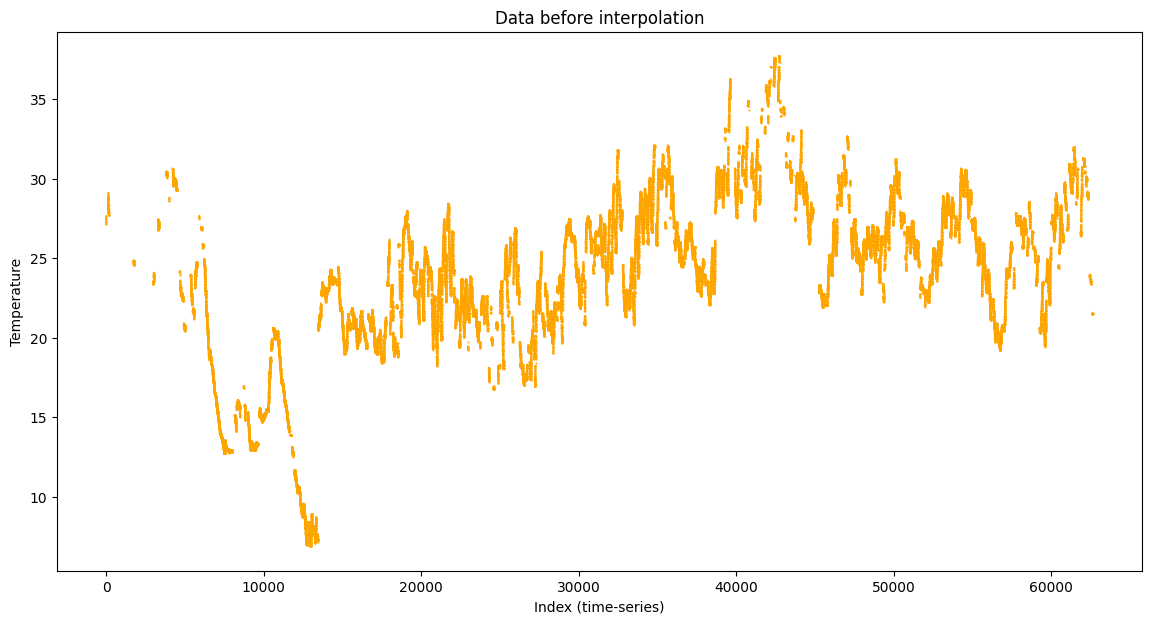

In [35]:
# 데이터 시각화
plt.figure(figsize=(14, 7))
plt.plot(data_df["Value"], linestyle="-", marker=".", markersize=1, color="orange")
plt.title("Data before interpolation")
plt.xlabel("Index (time-series)")
plt.ylabel("Temperature")
plt.show()


In [36]:
# 비어있는 크기 확인
data_df["has_missing"] = data_df["Value"].isna()

missing_counts = []
missing_indexes = []

count = 0
indexes = []

for index, row in data_df.iterrows():
    value, has_missing = row["Value"], row["has_missing"]

    if has_missing:
        count += 1
        indexes.append(index)
        continue
    
    if 0 < count:
        missing_counts.append(count)
        missing_indexes.append(indexes)
        count = 0
        indexes = []

In [37]:
# 1000개 이상의 데이터가 비어있는 경우도 있다.
[mc for mc in missing_counts if 10 < mc]

[120,
 1577,
 1234,
 11,
 245,
 481,
 151,
 207,
 101,
 191,
 21,
 55,
 45,
 25,
 338,
 37,
 49,
 143,
 134,
 63,
 39,
 37,
 35,
 53,
 13,
 15,
 186,
 17,
 58,
 227,
 66,
 145,
 42,
 94,
 47,
 64,
 39,
 67,
 36,
 65,
 78,
 78,
 41,
 54,
 17,
 83,
 45,
 29,
 23,
 36,
 47,
 21,
 39,
 43,
 49,
 83,
 45,
 21,
 39,
 79,
 27,
 45,
 83,
 50,
 13,
 67,
 40,
 53,
 17,
 27,
 30,
 15,
 27,
 13,
 30,
 15,
 25,
 39,
 47,
 19,
 13,
 63,
 65,
 39,
 49,
 45,
 43,
 119,
 76,
 91,
 45,
 82,
 168,
 47,
 70,
 31,
 19,
 37,
 49,
 39,
 64,
 43,
 17,
 49,
 27,
 76,
 78,
 70,
 52,
 38,
 60,
 15,
 36,
 52,
 76,
 80,
 58,
 43,
 19,
 29,
 11,
 102,
 23,
 15,
 31,
 32,
 30,
 61,
 19,
 51,
 33,
 29,
 29,
 43,
 19,
 49,
 48,
 43,
 59,
 44,
 50,
 15,
 15,
 87,
 44,
 81,
 39,
 43,
 39,
 24,
 69,
 23,
 47,
 50,
 93,
 23,
 19,
 25,
 49,
 33,
 86,
 15,
 16,
 39,
 13,
 67,
 13,
 11,
 288,
 17,
 16,
 25,
 55,
 28,
 13,
 39,
 49,
 41,
 146,
 65,
 33,
 29,
 41,
 66,
 27,
 173,
 55,
 43,
 21,
 59,
 49,
 188,
 176,
 17,
 40,


## 데이터 보간 및 제출을 통한 성능 확인
- train 데이터가 따로 없어 제출을 통해 성능을 확인해야한다.

In [39]:
submission_df = pd.read_csv("./data/sample_submission.csv")
submission_df

,id,Value
0,SAMPLE_00000,27.636770
1,SAMPLE_00001,27.250818
2,SAMPLE_00002,27.154348
3,SAMPLE_00003,0.000000
4,SAMPLE_00004,0.000000
...,...,...
62624,SAMPLE_62624,0.000000
62625,SAMPLE_62625,0.000000
62626,SAMPLE_62626,21.465771
62627,SAMPLE_62627,21.562141


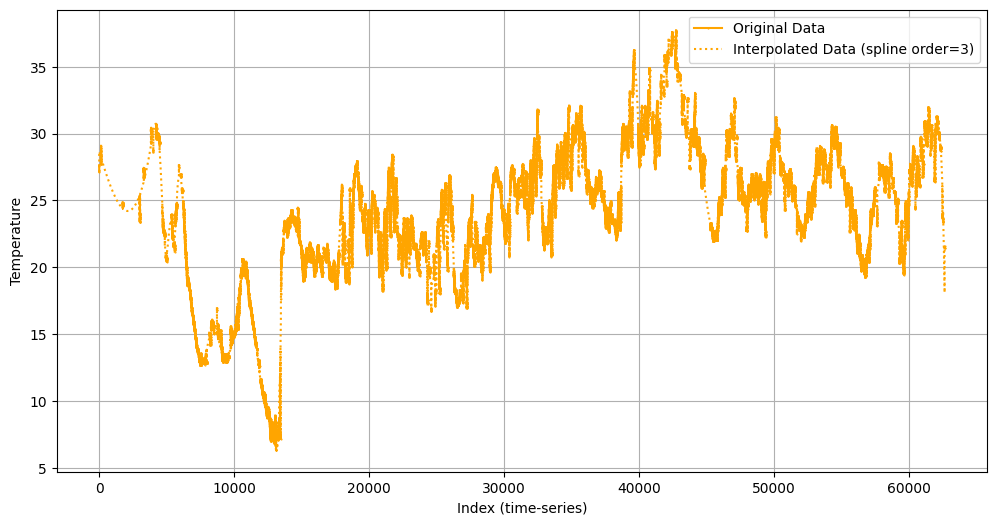

In [45]:
# 3.03261
submission_df["Value"] = data_df['Value'].interpolate(method='spline', order=3)
submission_df.to_csv("./data/submission_spline_3.csv", index=False)

# 원본 데이터와 보간된 데이터를 시각화
plt.figure(figsize=(12, 6))
plt.plot(data_df['Value'], label='Original Data', linestyle='-', marker='.', markersize=1, color="orange")
plt.plot(submission_df["Value"], label='Interpolated Data', linestyle='dotted', color="orange")
plt.xlabel('Index (time-series)')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)

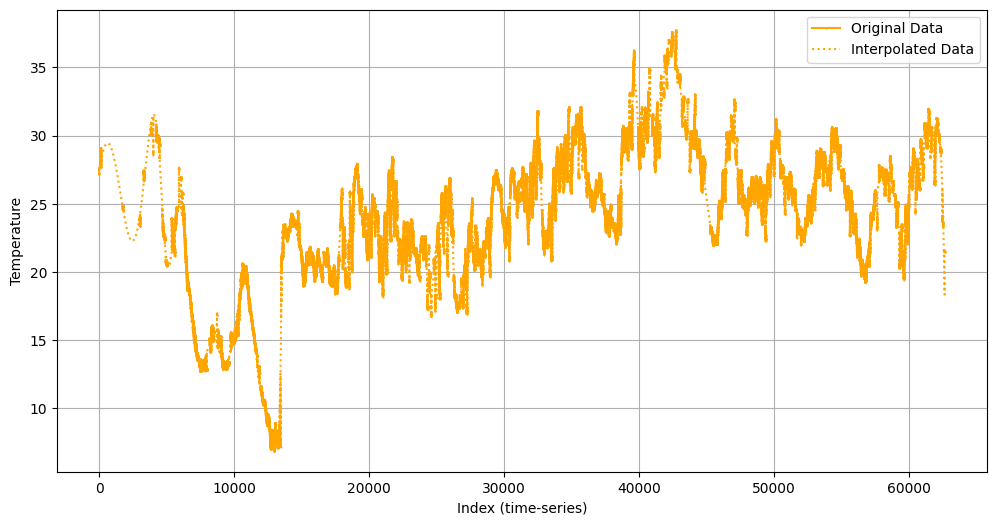

In [46]:
# 3.0334
submission_df["Value"] = data_df['Value'].interpolate(method='spline', order=5)
submission_df.to_csv("./data/submission_time_5.csv", index=False)

# 원본 데이터와 보간된 데이터를 시각화
plt.figure(figsize=(12, 6))
plt.plot(data_df['Value'], label='Original Data', linestyle='-', marker='.', markersize=1, color="orange")
plt.plot(submission_df["Value"], label='Interpolated Data', linestyle='dotted', color="orange")
plt.xlabel('Index (time-series)')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)

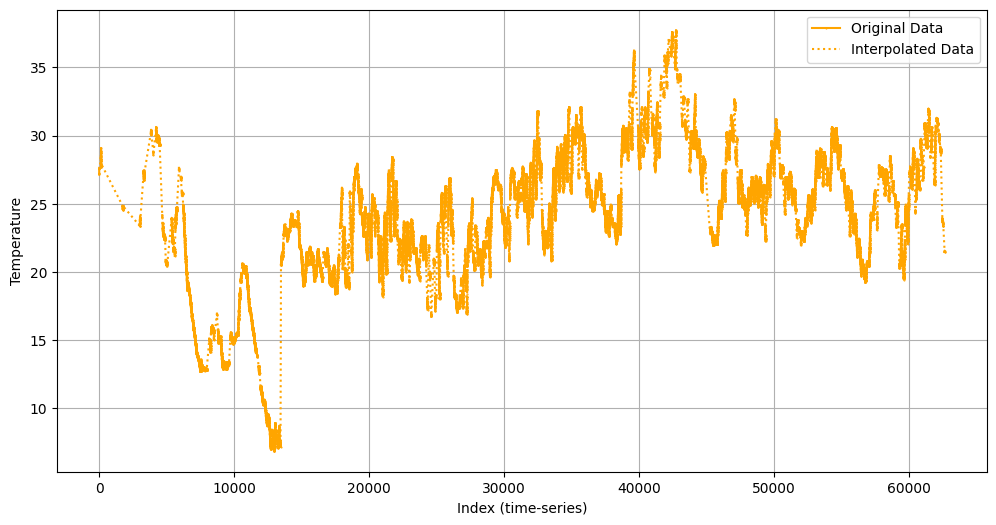

In [47]:
# 2.7877
submission_df["Value"] = data_df['Value'].interpolate(method='linear')
submission_df.to_csv("./data/submission_linear.csv", index=False)

# 원본 데이터와 보간된 데이터를 시각화
plt.figure(figsize=(12, 6))
plt.plot(data_df['Value'], label='Original Data', linestyle='-', marker='.', markersize=1, color="orange")
plt.plot(submission_df["Value"], label='Interpolated Data', linestyle='dotted', color="orange")
plt.xlabel('Index (time-series)')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)

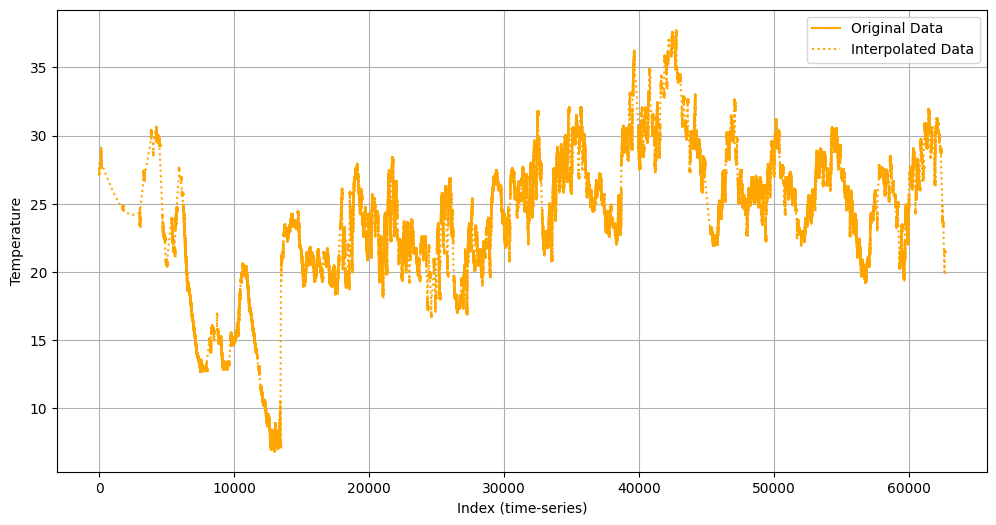

In [48]:
submission_df["Value"] = (data_df['Value'].interpolate("linear") + data_df['Value'].interpolate("spline", order=3)) / 2
submission_df.to_csv("./data/submission_spline_linear.csv", index=False)

# 원본 데이터와 보간된 데이터를 시각화
plt.figure(figsize=(12, 6))
plt.plot(data_df['Value'], label='Original Data', linestyle='-', marker='.', markersize=1, color="orange")
plt.plot(submission_df["Value"], label='Interpolated Data', linestyle='dotted', color="orange")
plt.xlabel('Index (time-series)')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)

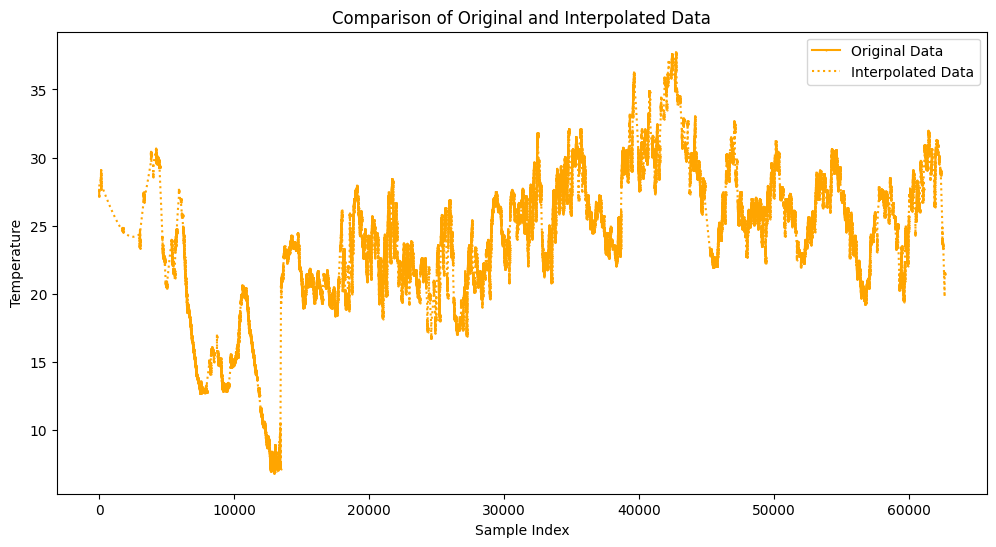

In [25]:
import matplotlib.pyplot as plt

# 원본 데이터와 보간된 데이터를 시각화
plt.figure(figsize=(12, 6))
plt.plot(data_df['Value'], label='Original Data', linestyle='-', marker='.', markersize=1, color="orange")
plt.plot(submission_df["Value"], label='Interpolated Data', linestyle='dotted', color="orange")
plt.title('Comparison of Original and Interpolated Data')
plt.xlabel('Sample Index')
plt.ylabel('Temperature')
plt.legend()
plt.show()
